# Project 2

# Supervised classification based on Biomedical Image

## 1. Loading data

In [2]:
# loading an image
from skimage import io
import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt

# input image 
coll = io.ImageCollection(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\image_dataset'+'\*.tif')
coll.files


['C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_120w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_120w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_202w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_202w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_204w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_204w2.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\\image_dataset\\F01_291w1.TIF',
 'C:\\Users\\HP\\Desktop\\MMNS\\Image Recognition and Deep Machine Learning\\Ass2\\Project_files\

(1040, 1392, 3)


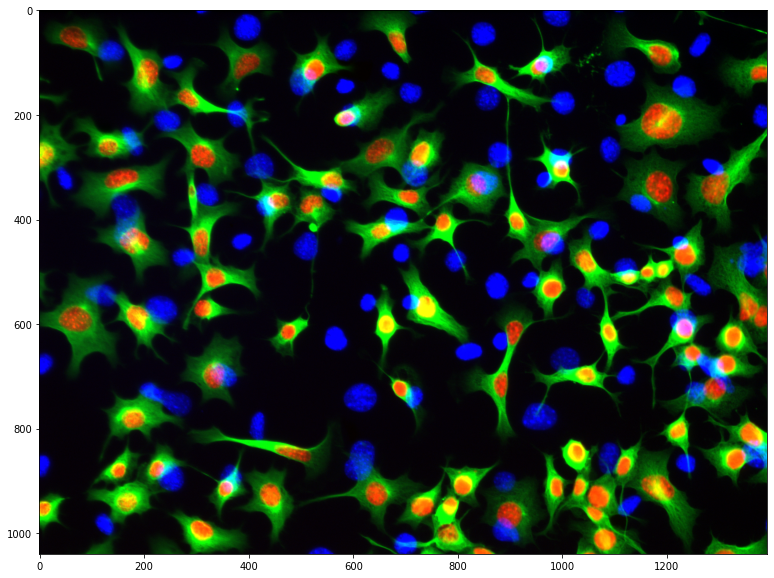

In [3]:
# visualisation of the image
import numpy as np
from skimage import exposure
from matplotlib import pyplot as plt

# color composition
im_comp=np.dstack([coll[3]/coll[3].max(), coll[2]/coll[2].max(), coll[1]/coll[1].max()])

# histogram equalization
for i in range(3):
    v_min, v_max = np.percentile(im_comp[:,:,i],(1,98))
    im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
    #return im_comp
print(im_comp.shape)
plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()

In [4]:
# loading training data

p_cultured_neuroblastoma = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\training_cultured neuroblastoma.txt',dtype='int')
print(p_cultured_neuroblastoma)
p_DAPI = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\training_DAPI.txt',dtype='int')
p_blue_cells = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\training_blue_cells.txt',dtype='int')
p_no_observation = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\training_no_observation.txt',dtype='int')


[[ 319  526]
 [ 408  323]
 [ 430  784]
 [ 592  764]
 [ 514  367]
 [ 413  325]
 [ 410  321]
 [ 405  319]
 [ 441  785]
 [ 434  781]
 [ 319  513]
 [ 319  515]
 [ 320  519]
 [ 318  517]
 [ 318  508]
 [ 317  508]
 [ 311  508]
 [ 311  501]
 [ 196  648]
 [ 188  648]
 [ 183  645]
 [ 183  645]
 [ 165  649]
 [ 179  654]
 [ 410  959]
 [ 412  957]
 [ 435  931]
 [ 453  932]
 [ 461  932]
 [ 463  932]
 [ 468  919]
 [ 468  919]
 [ 472  915]
 [ 475  911]
 [ 590  769]
 [ 590  773]
 [ 592  779]
 [ 597  784]
 [ 603  788]
 [ 607  792]
 [ 608  794]
 [ 610  800]
 [ 612  802]
 [ 616  806]
 [ 621  809]
 [ 621  810]
 [ 531  729]
 [ 523  729]
 [ 518  727]
 [ 517  720]
 [ 508  713]
 [ 505  708]
 [ 512  708]
 [ 518  710]
 [ 523  712]
 [ 526  714]
 [ 565  666]
 [ 562  664]
 [ 555  664]
 [ 551  663]
 [ 632  662]
 [ 635  662]
 [ 643  664]
 [ 657  659]
 [ 662  659]
 [ 666  659]
 [ 675  659]
 [ 677  659]
 [ 595  498]
 [ 600  498]
 [ 604  499]
 [ 603  504]
 [ 637  464]
 [ 637  470]
 [ 643  472]
 [ 646  474]
 [ 647  478]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


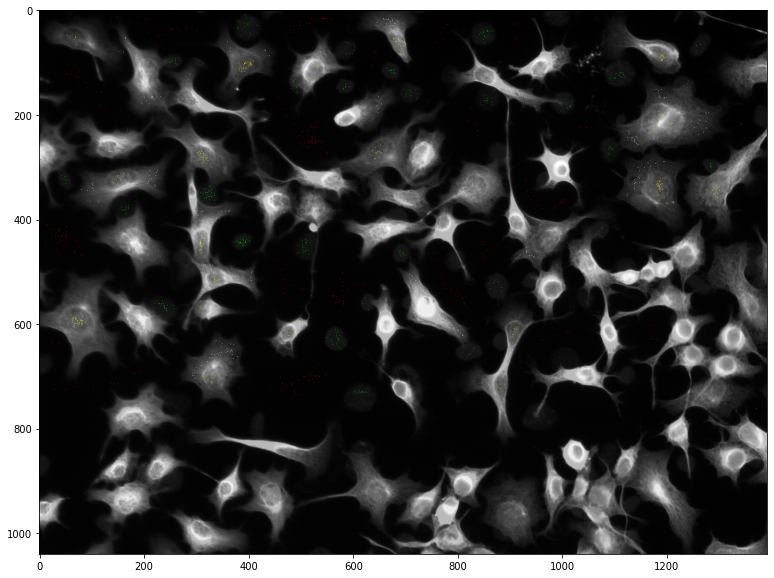

In [129]:
# visualisation of the training points

from skimage.color import rgb2gray
im_comp_p = np.zeros(im_comp.shape)
im_comp_p[:,:,0] = rgb2gray(im_comp)
im_comp_p[:,:,1] = rgb2gray(im_comp)
im_comp_p[:,:,2] = rgb2gray(im_comp)

# cultured neuroblastoma
im_comp_p[p_cultured_neuroblastoma[:,0],p_cultured_neuroblastoma[:,1],0] = 0
im_comp_p[p_cultured_neuroblastoma[:,0],p_cultured_neuroblastoma[:,1],1] = 0
im_comp_p[p_cultured_neuroblastoma[:,0],p_cultured_neuroblastoma[:,1],] = 255

# DAPI
im_comp_p[p_DAPI[:,0],p_DAPI[:,1],0] = 255
im_comp_p[p_DAPI[:,0],p_DAPI[:,1],1] = 255
im_comp_p[p_DAPI[:,0],p_DAPI[:,1],2] = 0

# blue_cells
im_comp_p[p_blue_cells[:,0],p_blue_cells[:,1],0] = 0
im_comp_p[p_blue_cells[:,0],p_blue_cells[:,1],1] = 255
im_comp_p[p_blue_cells[:,0],p_blue_cells[:,1],2] = 0

# no_observation
im_comp_p[p_no_observation[:,0],p_no_observation[:,1],0] = 255
im_comp_p[p_no_observation[:,0],p_no_observation[:,1],1] = 0
im_comp_p[p_no_observation[:,0],p_no_observation[:,1],2] = 0



plt.figure(figsize=(20,10))
plt.imshow(im_comp_p)
plt.show()

### 2. Data transformation for supervised classification
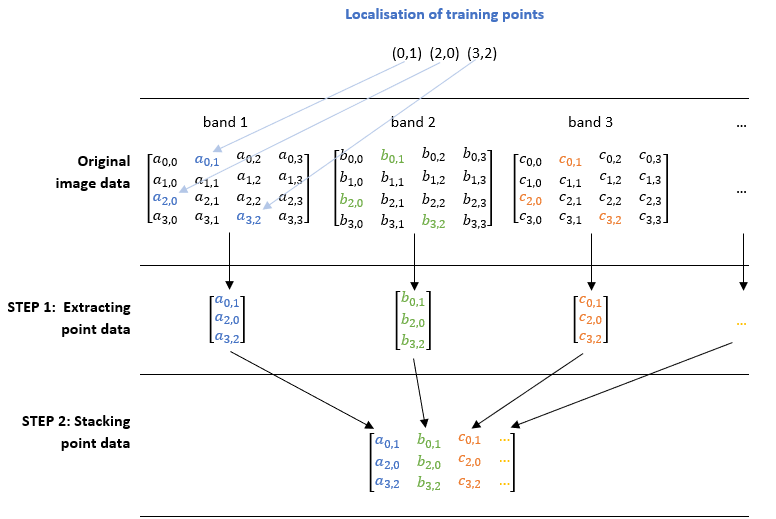

In [131]:
# cultured neuroblastoma

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_cultured_neuroblastoma[:,0],p_cultured_neuroblastoma[:,1]]
    channels.append(channel)
    
# step 2:
X_cultured_neuroblastoma = np.stack(channels).T

print(X_cultured_neuroblastoma.shape)



# DAPI

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_DAPI[:,0],p_DAPI[:,1]]
    channels.append(channel)
    
# step 2:
X_DAPI = np.stack(channels).T



# blue_cells

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_blue_cells[:,0],p_blue_cells[:,1]]
    channels.append(channel)
    
# step 2:
X_blue_cells = np.stack(channels).T



# no_observation

# step 1:
channels=[]
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_no_observation[:,0],p_no_observation[:,1]]
    channels.append(channel)
    
# step 2:
X_no_observation = np.stack(channels).T




(310, 200)


In [37]:
# stacking class data into one array
X = np.vstack((X_cultured_neuroblastoma,X_DAPI,X_blue_cells,X_no_observation))

n_cultured_neuroblastoma = np.ones((X_cultured_neuroblastoma.shape[0],1))
#print(n_water)
n_DAPI= 2*np.ones((X_DAPI.shape[0],1))
n_blue_cells = 3*np.ones((X_blue_cells.shape[0],1))
n_no_observation = 4*np.ones((X_no_observation.shape[0],1))

Y = np.vstack([n_cultured_neuroblastoma,n_DAPI,n_blue_cells,n_no_observation])
print(Y)

[[1.]
 [1.]
 [1.]
 ...
 [4.]
 [4.]
 [4.]]


# 3 Training a classifier

## a- Decision Tree Classifier method

In [101]:
# training a classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf1 = DecisionTreeClassifier(max_depth = 10)

dt_clf1.fit(X,np.ravel(Y))

DecisionTreeClassifier(max_depth=10)

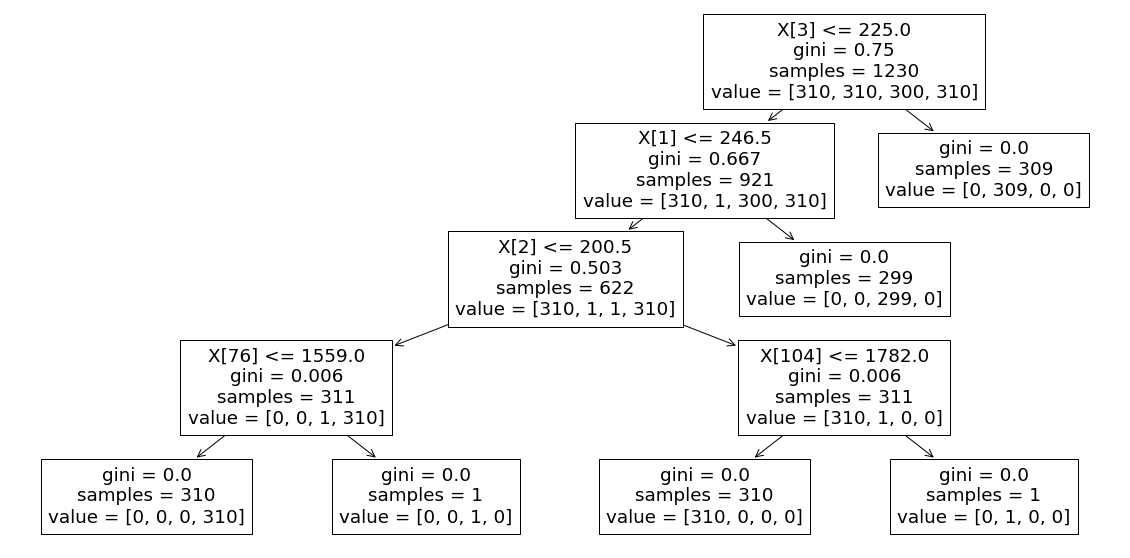

In [102]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf1)
plt.show()

### - Transformation and classification of the whole image

In [103]:
# data transformation
channels=[]
for i in range(len(coll)):
    channel=np.asarray(coll[i].data).flatten()
    channels.append(channel)
    
X_all = np.stack(channels).T

In [104]:
# classification of the whole image
pred1 = dt_clf1.predict(X_all)
print(pred1.shape)

(1447680,)


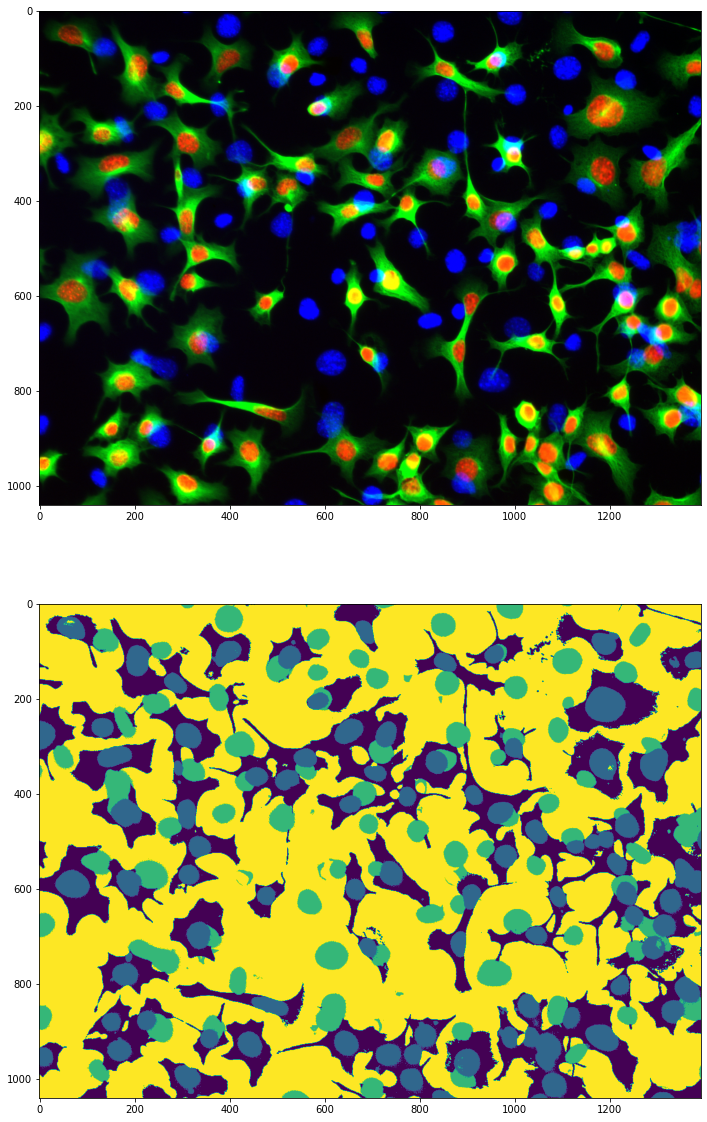

In [105]:
# visualisation of results


# classified image
pred_im1 = pred.reshape(coll[0].shape)
fig, arr=plt.subplots(2,1,figsize=(40,20))

arr[0].imshow(im_comp)
arr[1].imshow(pred_im1)



## b Decision Tree Regresser method

In [106]:
# training a classifier
from sklearn import tree
dt_clf_2 = tree.DecisionTreeRegressor(max_depth=10)

dt_clf_2.fit(X,np.ravel(Y))

DecisionTreeRegressor(max_depth=10)

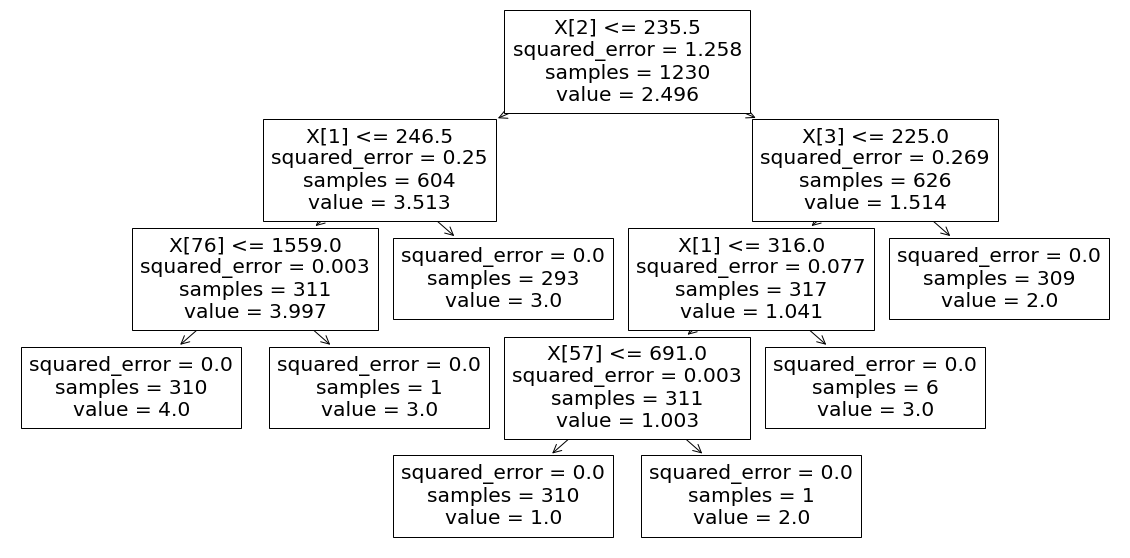

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf_2)
plt.show()

In [108]:
# data transformation
channels=[]
for i in range(len(coll)):
    channel=np.asarray(coll[i].data).flatten()
    channels.append(channel)
    
X_all = np.stack(channels).T

In [109]:
# classification of the whole image
pred = dt_clf_2.predict(X_all)
print(pred.shape)

(1447680,)


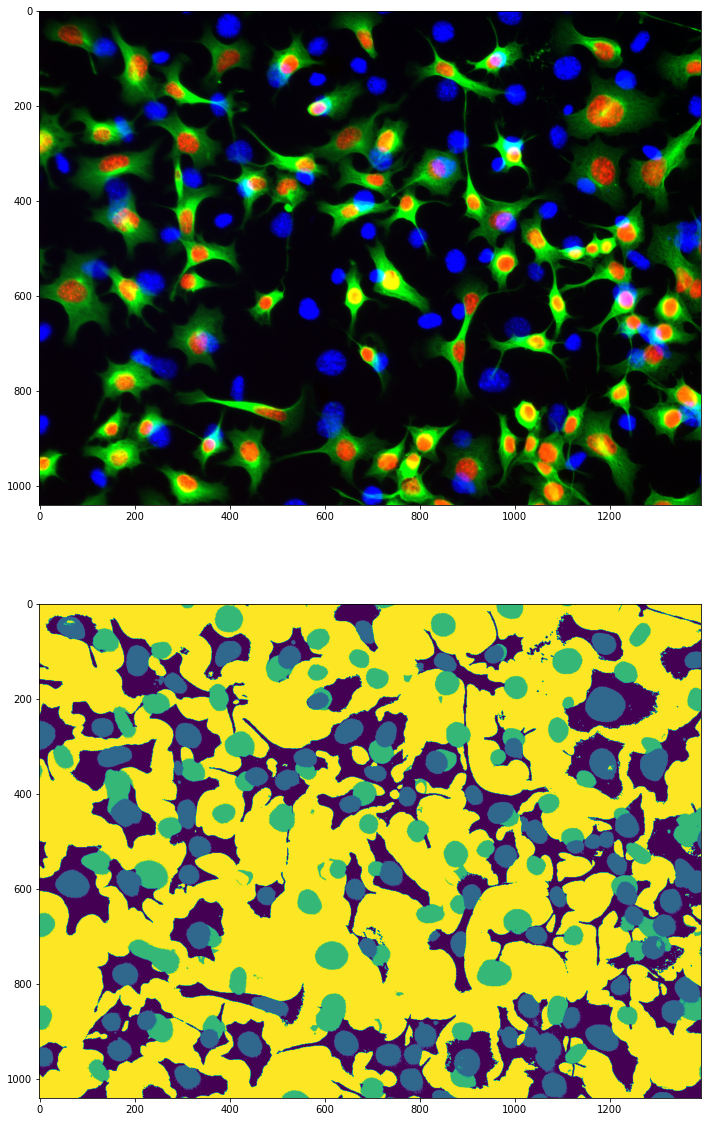

In [110]:
 #visualisation of results

# classified image
pred_im_2 = pred.reshape(coll[0].shape)
fig, arr=plt.subplots(2,1,figsize=(40,20))
#Original image
arr[0].imshow(im_comp)
arr[1].imshow(pred_im_2)


-----

# 4 - Assessment of classification results

## Loading and visualizing test/validation data


In [93]:
import numpy as np

p_val = np.loadtxt(r'C:\Users\HP\Desktop\MMNS\Image Recognition and Deep Machine Learning\Ass2\Project_files\test_points.txt',dtype='int')


p_val

array([[ 225, 1259,    1],
       [ 229, 1260,    1],
       [ 189, 1261,    1],
       [ 162, 1175,    1],
       [ 161, 1181,    1],
       [ 161, 1182,    1],
       [ 161, 1187,    1],
       [ 163, 1191,    1],
       [ 164, 1194,    1],
       [ 166, 1195,    1],
       [ 183, 1246,    1],
       [ 190, 1253,    1],
       [ 193, 1253,    1],
       [ 200, 1255,    1],
       [ 211, 1256,    1],
       [ 215, 1254,    1],
       [ 217, 1258,    1],
       [ 212, 1266,    1],
       [ 212, 1266,    1],
       [ 213, 1268,    1],
       [ 226, 1265,    1],
       [ 221, 1264,    1],
       [ 205, 1263,    1],
       [ 223, 1264,    1],
       [ 239, 1262,    1],
       [ 232, 1260,    1],
       [ 222, 1261,    1],
       [ 248, 1139,    1],
       [ 243, 1138,    1],
       [ 242, 1135,    1],
       [ 239, 1132,    1],
       [ 234, 1130,    1],
       [ 237, 1132,    1],
       [ 240, 1133,    1],
       [ 245, 1134,    1],
       [ 247, 1136,    1],
       [ 250, 1139,    1],
 

In [94]:
# running script with auxiliary functions
%run functions.ipynb

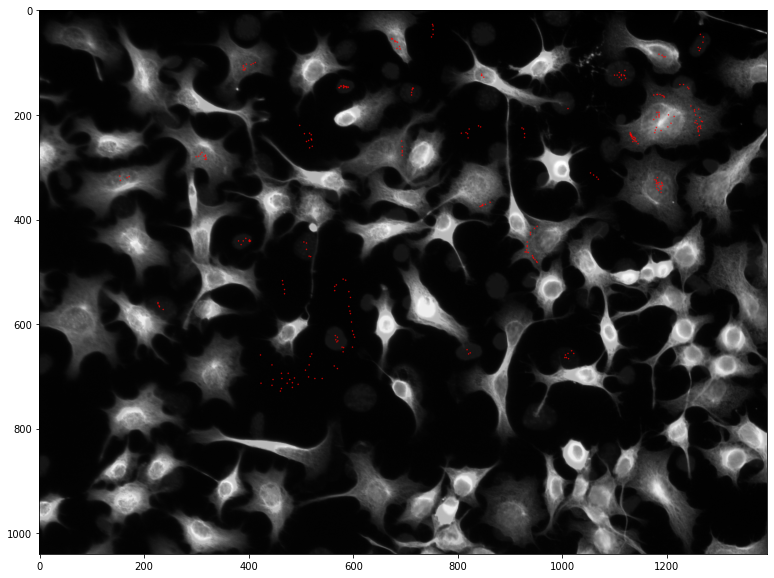

In [95]:
# displaying test/validation points

im_comp_pval = visualize_points(im_comp,p_val)

plt.figure(figsize=(20,10))
plt.imshow(im_comp_pval)

# 5. Classification results assessment (validation)

##  a. Assessement of Decision Tree Classifier

Overall accuracy of the Decision Tree Classifier method: 99.0%:


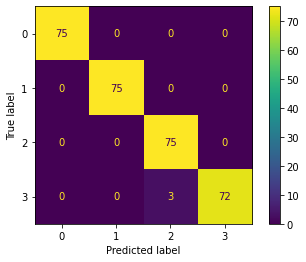

In [133]:
# reading classes of points from classification results
pred_val1 = pred_im1[p_val[:,0],p_val[:,1]]

# overall accuracy
from sklearn.metrics import accuracy_score
ovAcc1 = accuracy_score(p_val[:,2],pred_val1)
print("Overall accuracy of the Decision Tree Classifier method: " + str(100*ovAcc1) + "%:")

# confusion matrix
from sklearn.metrics import confusion_matrix
confM1 = confusion_matrix(p_val[:,2],pred_val)

# visualisation of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp1 = ConfusionMatrixDisplay(confM1)
disp1.plot()

## b.Assessement of Decision Tree Classifier

Overall accuracy od the Decision Tree Classifier method: 99.0%:


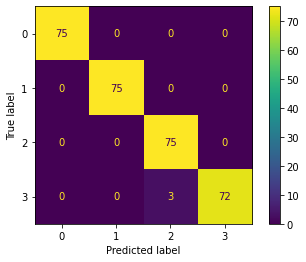

In [128]:
#reading classes of points from classification results
pred_val2 = pred_im2[p_val[:,0],p_val[:,1]]

# overall accuracy
from sklearn.metrics import accuracy_score
ovAcc2 = accuracy_score(p_val[:,2],pred_val2)
print("Overall accuracy od the Decision Tree Classifier method: " + str(100*ovAcc2) + "%:")

# confusion matrix
from sklearn.metrics import confusion_matrix
confM2 = confusion_matrix(p_val[:,2],pred_val2)

# visualisation of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp2 = ConfusionMatrixDisplay(confM2)
disp2.plot()